In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import string
import re
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')
nltk.download ('words')
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.corpus import words
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
# Load the data set as df3.
tweets_cycling = pd.read_csv('tweets_cycling.csv')

# View DataFrame.
tweets_cycling

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,Wed May 10 19:00:57 +0000 2023,1656373779591843849,1656373779591843849,RT @adamtranter: This is obviously good news b...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,Wed May 10 18:57:11 +0000 2023,1656372829334433815,1656372829334433815,"RT @HanneyDP: As positive as this’ll be, it al...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,Wed May 10 18:56:43 +0000 2023,1656372713869418496,1656372713869418496,https://t.co/L5UPa8eLhV\n\nA number of us are ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,1,False,False,en,False,NaN,NaN,NaN,NaN,NaN
3,Wed May 10 18:55:18 +0000 2023,1656372355222892558,1656372355222892558,Who are London’s cyclists? We take a look at w...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://twitter.com"" rel=""nofollow"">T...",NaN,NaN,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
4,Wed May 10 18:55:09 +0000 2023,1656372320158511139,1656372320158511139,@London_Cycling @limebike EQUALITY?\n\nThere's...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.656324e+18,1.656324e+18,...,0,False,False,en,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Mon May 01 09:39:09 +0000 2023,1652970906891833346,1652970906891833346,@QuailFp @CyclingHull @Andrius21272467 @CycleC...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.652958e+18,1.652958e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2996,Mon May 01 09:38:24 +0000 2023,1652970718936571906,1652970718936571906,@CurlyAdventurer @London_Cycling Thank you - h...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.652963e+18,1.652963e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2997,Mon May 01 09:38:01 +0000 2023,1652970619602870272,1652970619602870272,RT @CurlyAdventurer: @RBKgreens Another intere...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2998,Mon May 01 09:37:06 +0000 2023,1652970392099725313,1652970392099725313,@QuailFp @CyclingHull @Andrius21272467 @CycleC...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.652967e+18,1.652967e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Determine values of output.
tweets_text = tweets_cycling['text'].values

# View results.
tweets_text

array(['RT @adamtranter: This is obviously good news but very clearly highlights the importance of including active travel at the planning phase.…',
       'RT @HanneyDP: As positive as this’ll be, it also highlights the opportunity cost to building substandard infrastructure is in first place.…',
       'https://t.co/L5UPa8eLhV\n\nA number of us are running, rowing or cycling (virtually) from London 2 raising money for… https://t.co/SyT5GF9Uww',
       ...,
       'RT @CurlyAdventurer: @RBKgreens Another interesting scheme (aimed at people newer to cycling) is the @London_Cycling Cycle Buddies initiati…',
       '@QuailFp @CyclingHull @Andrius21272467 @CycleCalm @London_Cycling @citycyclists @willnorman Uh no. More pedestrians… https://t.co/TjRuFVDGXn',
       'RT @CurlyAdventurer: @RBKgreens Another interesting scheme (aimed at people newer to cycling) is the @London_Cycling Cycle Buddies initiati…'],
      dtype=object)

In [9]:
# The results will change every time the code is executed. Let's review the first 15.

for i in range(15):
    print(i)
    print(tweets_text[i])

0
RT @adamtranter: This is obviously good news but very clearly highlights the importance of including active travel at the planning phase.…
1
RT @HanneyDP: As positive as this’ll be, it also highlights the opportunity cost to building substandard infrastructure is in first place.…
2
https://t.co/L5UPa8eLhV

A number of us are running, rowing or cycling (virtually) from London 2 raising money for… https://t.co/SyT5GF9Uww
3
Who are London’s cyclists? We take a look at what they ride and how they dress – and whether they wear a helmet (+v… https://t.co/wlolTK6qV2
4
@London_Cycling @limebike EQUALITY?

There's a curious anti-cycling grift linked to disability issues. 

Impossible… https://t.co/1eGt4P3zou
5
RT @London_Cycling: Women in London - we want to hear from you!

😢Lack of safe routes put you off riding a bike?
🤬Been harassed or abused w…
6
RT @ediz1975: 10/05/23 The reality is we are dying slowly to provide quiet roads for others with even more congestion than we ever had. The…
7
@

In [11]:
# Look at one raw tweet
# Based on the results of the previous cell, select a tweet in English that contains keywords suitable for text analysis

# Set the index of the Tweet to be returned
tid = 5
tweets_text[tid]

'RT @London_Cycling: Women in London - we want to hear from you!\n\n😢Lack of safe routes put you off riding a bike?\n🤬Been harassed or abused w…'

In [12]:
# Split up each tweet into individual words
tweets_token = [word_tokenize(_) for _ in tweets_text]

# View results.
tweets_token

[['RT',
  '@',
  'adamtranter',
  ':',
  'This',
  'is',
  'obviously',
  'good',
  'news',
  'but',
  'very',
  'clearly',
  'highlights',
  'the',
  'importance',
  'of',
  'including',
  'active',
  'travel',
  'at',
  'the',
  'planning',
  'phase.…'],
 ['RT',
  '@',
  'HanneyDP',
  ':',
  'As',
  'positive',
  'as',
  'this',
  '’',
  'll',
  'be',
  ',',
  'it',
  'also',
  'highlights',
  'the',
  'opportunity',
  'cost',
  'to',
  'building',
  'substandard',
  'infrastructure',
  'is',
  'in',
  'first',
  'place.…'],
 ['https',
  ':',
  '//t.co/L5UPa8eLhV',
  'A',
  'number',
  'of',
  'us',
  'are',
  'running',
  ',',
  'rowing',
  'or',
  'cycling',
  '(',
  'virtually',
  ')',
  'from',
  'London',
  '2',
  'raising',
  'money',
  'for…',
  'https',
  ':',
  '//t.co/SyT5GF9Uww'],
 ['Who',
  'are',
  'London',
  '’',
  's',
  'cyclists',
  '?',
  'We',
  'take',
  'a',
  'look',
  'at',
  'what',
  'they',
  'ride',
  'and',
  'how',
  'they',
  'dress',
  '–',
  'and',
  

In [18]:
# Get a list of all english words so we can exclude anything that doesnt appear on the list
all_english_words = set(words.words())

# View results.
all_english_words

{'operativity',
 'deranged',
 'amitotically',
 'mosquitocide',
 'scopoletin',
 'cheeseboard',
 'hotchpot',
 'kokum',
 'unharmonize',
 'nosarian',
 'Drydenism',
 'storeen',
 'tupman',
 'acrocoracoid',
 'unoriginate',
 'epicnemial',
 'monolingual',
 'cherry',
 'Chilostomata',
 'zoospore',
 'titanite',
 'ginglyni',
 'Aulostoma',
 'pachyrhynchous',
 'sinus',
 'unupbraiding',
 'Newtonic',
 'olio',
 'creativeness',
 'resorufin',
 'redamage',
 'dystaxia',
 'inexpressibility',
 'antifelony',
 'Ciceronian',
 'hemicycle',
 'territorial',
 'thermotropic',
 'arthrotrauma',
 'inconsolableness',
 'beggable',
 'cupuliferous',
 'mothy',
 'medithorax',
 'Notogaeal',
 'puzzler',
 'Mycteria',
 'subaerially',
 'hutia',
 'ternatipinnate',
 'setoff',
 'ponderling',
 'Hebrewism',
 'tupara',
 'bistoury',
 'homogenic',
 'micropoicilitic',
 'Pachons',
 'pycnidiospore',
 'solemnness',
 'hominivorous',
 'fortunetelling',
 'chylothorax',
 'basanite',
 'countermove',
 'ancoral',
 'indicolite',
 'microscopal',
 'Luc

In [25]:
clean_tweets_token = [[y.lower() for y in x if y.lower() not in stop_words and y.isalpha() and \
                       y.lower() in all_english_words] for x in tweets_token]

In [27]:
# Let's have a look at the same tweet as above

clean_tweets_token[tid]

['want', 'hear', 'safe', 'put', 'riding', 'bike']

##  Perform sentiment analysis

In [28]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\greic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

df_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in clean_tweets_token}

In [30]:
# Convert the list of dictionary results to a Pandas DataFrame.
# The index is the cleaned tweet.
# We can see some of the highly positive words. 
polarity = pd.DataFrame(df_polarity).T

# View the DataFrame.
polarity

,neg,neu,pos,compound
obviously good news clearly importance active travel,0.0,0.217,0.783,0.8689
positive also opportunity cost building substandard infrastructure first,0.0,0.484,0.516,0.7506
number us running rowing cycling virtually raising money,0.0,0.843,0.157,0.0772
take look ride dress whether wear helmet,0.0,1.000,0.000,0.0000
equality curious grift linked disability,0.0,0.635,0.365,0.3182
...,...,...,...,...
cult cycling take government needs cycling,0.0,1.000,0.000,0.0000
last year people,0.0,1.000,0.000,0.0000
pretty much everybody,0.0,0.385,0.615,0.4939
thank happy give publicity,0.0,0.244,0.756,0.7351


In [31]:
# With the non-aplhanumeric words (the emojis, handles, hashtags and stopwords) removed 
# some of the most positive words are single words

# Get the top 5 most positive cleaned tweets related to cheesecake
polarity.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
great,0.0,0.0,1.0,0.6249
increase,0.0,0.0,1.0,0.3182
responsible,0.0,0.0,1.0,0.3182
wow,0.0,0.0,1.0,0.5859
interesting,0.0,0.0,1.0,0.4019
easy,0.0,0.0,1.0,0.4404
yeah,0.0,0.0,1.0,0.2960
yep agree,0.0,0.0,1.0,0.5719
want,0.0,0.0,1.0,0.0772
joke,0.0,0.0,1.0,0.2960


In [32]:
# Get the top 5 most negative words related to cheesecake
polarity.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
stop,1.0,0.0,0.0,-0.2960
shame,1.0,0.0,0.0,-0.4767
problem,1.0,0.0,0.0,-0.4019
madness,1.0,0.0,0.0,-0.4404
shocking,1.0,0.0,0.0,-0.4019
vague,1.0,0.0,0.0,-0.1027
stop craziness,1.0,0.0,0.0,-0.5859
unfortunately,1.0,0.0,0.0,-0.3400
odd,1.0,0.0,0.0,-0.3182
obscene,1.0,0.0,0.0,-0.5859


In [33]:
# The describe function on the compound will show the distribution and moments. 

polarity['compound'].describe()

count    1027.000000
mean        0.139544
std         0.340744
min        -0.784500
25%         0.000000
50%         0.000000
75%         0.401900
max         0.923100
Name: compound, dtype: float64

## Visualise the results

<AxesSubplot:>

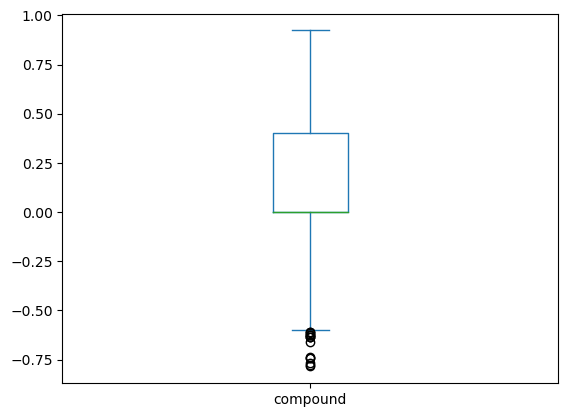

In [34]:
# Sometimes the best way to see is to plot. 
# In the data sampled here many of the values are 0
# There are less negative values than positive but the negative values are highly negative.

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity.reset_index()['compound'].sort_values()
_plot.plot(kind='box')

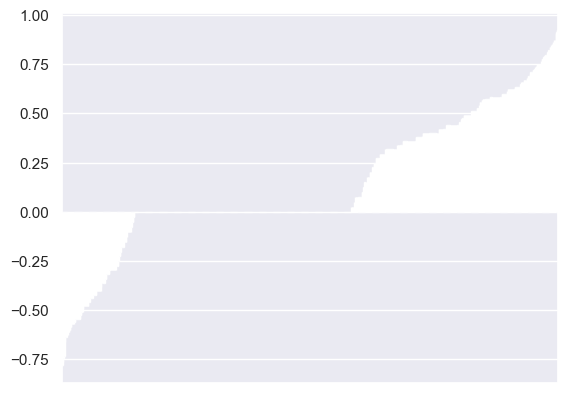

In [45]:
# Example of a barplot.
_plot = polarity.reset_index()['compound'].sort_values()
ax1 = plt.axes()
_plot.plot(kind='bar')

x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

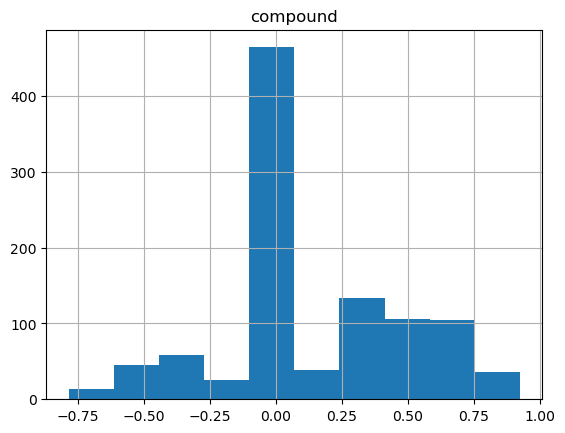

In [35]:
# You can also try to create a histogram:
polarity['compound'].sort_values().reset_index().hist()